# <font color='green'>UCI Audit Risk Project Part 2: Regression
### MIS 6V99.003 Machine Learning 
#### Abhishek Patil 


### Table of Contents:
1. [Data Pre-processing](#Data-Pre-processing)
    * [Importing Datasets](#Importing-Datasets)
    * [Exploring Data](#Exploring-Data)
    * [Merging Dataframes](#Merging-Dataframes)
    * [Data Cleaning](#Data-Cleaning)
    
    
2. [Correlation Matrix](#Correlation-Matrix)


3. [Regression](#Regression)
    * [Regression: Train-Test Split](#Regression:-Train-Test-Split)
    * [Regression: Feature Scaling](#Regression:-Feature-Scaling)
    * [Regression Models](#Regression:-Models)
        * [Bagging](#Bagging)
            * [Desision Tree Regressor with Bagging](#Desision-Tree-Regressor-with-Bagging)
            * [Linear Regression with Bagging](#Linear-Regression-with-Bagging)
        * [Pasting](#Pasting)
            * [KNN with Pasting](#KNN-with-Pasting)
            * [Linear Regression with Pasting](#Linear-Regression-with-Pasting)
        * [Adaboost](#Adaboost)
            * [Ridge with Adaboost](#Ridge-with-Adaboost)
            * [Lasso with Adaboost](#Lasso-with-Adaboost)
        * [Gradient Boosting Regressor](#Gradient-Boosting-Regressor)
        * [Boosting, Pasting and Bagging: Generating a Report table](#Boosting,-Pasting-and-Bagging:-Generating-a-Report-table)
        * [Principal Component Analysis](#Principal-Component-Analysis)
            * [KNN Regressor with PCA](#KNN-Regressor-with-PCA)
            * [Linear Regression](#Linear-Regression)
            * [Polynomial Regression with PCA](#Polynomial-Regression-with-PCA)
            * [Ridge Regression with PCA](#Ridge-Regression-with-PCA)
            * [Lasso Regression with PCA](#Lasso-Regression-with-PCA)
            * [SVM Regressor with PCA](#SVM-Regressor-with-PCA)
            * [SGD Regressor with PCA](#SGD-Regressor-with-PCA)
        * [Generating a Report table: PCA](#Generating-a-Report-table:-PCA)
        * [Neural Network Model](#Neural-Network-Model) 
        
        
4. [Model Selection](#Model-Selection)   
        
        
        

# Data Pre-processing

In [1]:
#Importing all the required libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)

## Importing Datasets

In [2]:
audit_risk = pd.read_csv("audit_risk.csv")
trial = pd.read_csv("trial.csv")

## Exploring Data

In [3]:
audit_risk.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,1.152964,14.137631,0.290979,8.265434,2.505155,0.206186,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,0.537417,66.606519,0.159745,39.970849,1.228678,0.037508,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,1.000000,0.090000,0.200000,0.018000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,1.000000,5.595000,0.400000,2.235000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,5.400000,935.030000,0.600000,561.018000,6.000000,0.600000,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [4]:
trial.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


Most columns from the 2 dataframes have similar feature names and also similar description. Some columns are in all capital letters, some have values in multiples of 10. The only columns in **'trial'** that are entirely differrent are **'Loss'** and **'Risk'**.

In [5]:
#Renaming columns
trial.columns = ['Sector_score','LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B',
       'Score_B',  'TOTAL', 'numbers', 'Marks',
       'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk_trial' ]

In [6]:
#Scaling data to match the data in the other dataframe
trial['Score_A'] = trial['Score_A']/10
trial['Score_B'] = trial['Score_B']/10

## Merging Dataframes

In [7]:
same_columns = np.intersect1d(audit_risk.columns, trial.columns)
same_columns

array(['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B',
       'Score', 'Score_A', 'Score_B', 'Sector_score', 'TOTAL', 'numbers'],
      dtype=object)

In [8]:
# Merge two Dataframes  on common columns  using outer join
merged_df = pd.merge(audit_risk, trial, how='outer', on = ['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B',
       'Score', 'Score_A', 'Score_B', 'Sector_score', 'TOTAL', 'numbers'])
merged_df.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk', 'Marks', 'MONEY_Marks',
       'District', 'Loss', 'LOSS_SCORE', 'History_score', 'Risk_trial'],
      dtype='object')

The dataframes have been succesfully merged.

## Data Cleaning

In [9]:
df = merged_df.drop(['Risk_trial'], axis = 1)

Here, I deleted the 'Risk_trial' column which as originally 'Risk' from 'trial.csv' as it had some values that were different from the 'Risk' column from 'audit_risk.csv'. Also, since it is a regression task, the Risk column is not required.

The paper provided by professor states that the values of 'Audit_Risk' being greater or equal to 1 are classified as 1 and 0 otherwise. 

This condition is being satisfied by the 'Risk' column in 'audit_risk.csv' and not by the 'Risk' column in 'trial.csv'.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 809
Data columns (total 33 columns):
Sector_score      810 non-null float64
LOCATION_ID       810 non-null object
PARA_A            810 non-null float64
Score_A           810 non-null float64
Risk_A            810 non-null float64
PARA_B            810 non-null float64
Score_B           810 non-null float64
Risk_B            810 non-null float64
TOTAL             810 non-null float64
numbers           810 non-null float64
Score_B.1         810 non-null float64
Risk_C            810 non-null float64
Money_Value       809 non-null float64
Score_MV          810 non-null float64
Risk_D            810 non-null float64
District_Loss     810 non-null int64
PROB              810 non-null float64
RiSk_E            810 non-null float64
History           810 non-null int64
Prob              810 non-null float64
Risk_F            810 non-null float64
Score             810 non-null float64
Inherent_Risk     810 non-null float64
CON

Money_Value has 1 missing value.

In [11]:
#Replacing the missing value by the median of the column
df['Money_Value'] = df['Money_Value'].fillna(df['Money_Value'].median())

In [12]:
df.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
count,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.0,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,21.406716,2.348556,0.344938,1.294561,10.347643,0.308395,6.068334,12.665829,5.064815,0.222716,1.146543,13.526807,0.287160,7.918490,2.493827,0.205926,0.516049,0.100000,0.216049,0.051358,2.674074,16.999643,0.567407,0.5,6.881682,0.379012,2.227160,2.871605,2.493827,0.028395,2.059259,2.160494
std,24.760476,5.579501,0.173042,3.378180,49.067564,0.167741,29.461510,50.292444,0.259188,0.078789,0.526897,65.213233,0.157414,39.157042,1.219166,0.036732,0.287118,0.520174,0.066628,0.299533,0.851869,53.676423,0.437573,0.0,37.871031,0.485441,0.787889,1.574145,1.219166,0.180464,0.367323,0.666277
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
25%,2.370000,0.070000,0.200000,0.014000,0.000000,0.200000,0.000000,0.430000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.564500,0.400000,0.5,0.312900,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
50%,3.890000,0.820000,0.200000,0.164000,0.335000,0.200000,0.067000,1.290000,5.000000,0.200000,1.000000,0.050000,0.200000,0.010000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.200000,2.116000,0.400000,0.5,0.470800,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
75%,55.570000,2.397500,0.600000,1.438500,2.985000,0.400000,1.347000,7.337500,5.000000,0.200000,1.000000,4.862500,0.200000,0.972500,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,3.200000,9.210500,0.400000,0.5,2.882700,1.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,5.400000,935.030000,0.600000,561.018000,6.000000,0.600000,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000


'Detection_Risk' and 'Risk_F' have the same values throughout the columns. Deleting these columns.

In [13]:
df = df.drop(['Detection_Risk', 'Risk_F'], axis = 1) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 809
Data columns (total 31 columns):
Sector_score     810 non-null float64
LOCATION_ID      810 non-null object
PARA_A           810 non-null float64
Score_A          810 non-null float64
Risk_A           810 non-null float64
PARA_B           810 non-null float64
Score_B          810 non-null float64
Risk_B           810 non-null float64
TOTAL            810 non-null float64
numbers          810 non-null float64
Score_B.1        810 non-null float64
Risk_C           810 non-null float64
Money_Value      810 non-null float64
Score_MV         810 non-null float64
Risk_D           810 non-null float64
District_Loss    810 non-null int64
PROB             810 non-null float64
RiSk_E           810 non-null float64
History          810 non-null int64
Prob             810 non-null float64
Score            810 non-null float64
Inherent_Risk    810 non-null float64
CONTROL_RISK     810 non-null float64
Audit_Risk       810 non-n

LOCATION_ID has object datatype. However there are numerical values in the column. There must be non-numeric values present.

In [14]:
#Unique values in LOCATION_ID column
df["LOCATION_ID"].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [15]:
print("These are the number of non-numeric values in LOCATION_ID: ", len(df[(df["LOCATION_ID"] == 'LOHARU') | (df["LOCATION_ID"] ==  'NUH') | (df["LOCATION_ID"] == 'SAFIDON')]))

These are the number of non-numeric values in LOCATION_ID:  3


Deleting the rows with these 3 values as there is no information about the sequencing of the numbers present in the LOCATION_ID column.

In [16]:
df = df[(df.LOCATION_ID != 'LOHARU')]
df = df[(df.LOCATION_ID != 'NUH')]
df = df[(df.LOCATION_ID != 'SAFIDON')]
df = df.astype(float)
print("Updated number of rows in the dataset: ",len(df))

Updated number of rows in the dataset:  807


Dropping duplicate values if any. Here the rows which intersected with both dataframes get deleted.  

In [17]:
df = df.drop_duplicates(keep = 'first')
print("Updated number of rows in the dataset: ",len(df))

Updated number of rows in the dataset:  760


In [18]:
#Number of unique values in each columns
for i in range(0, len(df.columns)):
    print(df.columns[i], ":", df.iloc[:,i].nunique())

Sector_score : 13
LOCATION_ID : 42
PARA_A : 362
Score_A : 3
Risk_A : 362
PARA_B : 358
Score_B : 3
Risk_B : 360
TOTAL : 470
numbers : 5
Score_B.1 : 3
Risk_C : 5
Money_Value : 327
Score_MV : 3
Risk_D : 327
District_Loss : 3
PROB : 3
RiSk_E : 5
History : 7
Prob : 3
Score : 17
Inherent_Risk : 583
CONTROL_RISK : 11
Audit_Risk : 600
Risk : 2
Marks : 3
MONEY_Marks : 3
District : 3
Loss : 3
LOSS_SCORE : 3
History_score : 3


# Correlation Matrix

In [19]:
import seaborn as sns
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True) 
corr.style.background_gradient(cmap=cm).set_precision(2)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
Sector_score,1,-0.052,-0.21,-0.42,-0.22,-0.13,-0.21,-0.13,-0.15,-0.15,-0.17,-0.16,-0.12,-0.32,-0.11,-0.11,-0.086,-0.13,-0.11,-0.14,-0.33,-0.17,-0.16,-0.091,-0.39,-0.17,-0.32,-0.11,-0.082,-0.086,-0.14
LOCATION_ID,-0.052,1,-0.0067,0.079,-0.0044,0.0066,0.13,0.0062,0.0065,0.0067,-0.018,-0.015,-0.067,0.11,-0.067,-0.11,-0.0034,-0.097,-0.082,-0.054,0.088,-0.047,-0.12,-0.087,0.063,-0.018,0.11,-0.11,0.0064,-0.0034,-0.054
PARA_A,-0.21,-0.0067,1,0.49,1,0.16,0.36,0.16,0.27,0.13,0.14,0.14,0.45,0.28,0.45,0.13,0.042,0.12,0.12,0.17,0.42,0.48,0.15,0.22,0.38,0.14,0.28,0.13,0.044,0.042,0.17
Score_A,-0.42,0.079,0.49,1,0.5,0.25,0.57,0.25,0.3,0.24,0.27,0.26,0.2,0.47,0.2,0.086,0.091,0.1,0.18,0.26,0.72,0.32,0.17,0.2,0.62,0.27,0.47,0.086,0.091,0.091,0.26
Risk_A,-0.22,-0.0044,1,0.5,1,0.16,0.36,0.16,0.27,0.13,0.14,0.14,0.45,0.29,0.45,0.13,0.042,0.12,0.12,0.17,0.43,0.48,0.15,0.22,0.38,0.14,0.29,0.13,0.045,0.042,0.17
PARA_B,-0.13,0.0066,0.16,0.25,0.16,1,0.35,1,0.99,0.21,0.23,0.22,0.12,0.31,0.12,0.083,0.042,0.079,0.2,0.32,0.4,0.65,0.19,0.89,0.26,0.23,0.31,0.083,0.044,0.042,0.32
Score_B,-0.21,0.13,0.36,0.57,0.36,0.35,1,0.35,0.38,0.28,0.31,0.3,0.2,0.56,0.2,-0.0077,0.091,0.012,0.2,0.31,0.9,0.36,0.12,0.21,0.63,0.31,0.56,-0.0077,0.097,0.091,0.31
Risk_B,-0.13,0.0062,0.16,0.25,0.16,1,0.35,1,0.99,0.21,0.23,0.22,0.12,0.31,0.12,0.083,0.042,0.079,0.2,0.32,0.4,0.65,0.19,0.89,0.25,0.23,0.31,0.083,0.044,0.042,0.32
TOTAL,-0.15,0.0065,0.27,0.3,0.27,0.99,0.38,0.99,1,0.22,0.24,0.23,0.17,0.34,0.17,0.093,0.046,0.088,0.21,0.33,0.43,0.69,0.2,0.89,0.29,0.24,0.34,0.093,0.048,0.046,0.33
numbers,-0.15,0.0067,0.13,0.24,0.13,0.21,0.28,0.21,0.22,1,0.91,0.96,0.19,0.45,0.19,0.12,0.035,0.14,0.2,0.21,0.5,0.27,0.23,0.22,0.31,0.91,0.45,0.12,-0.0024,0.035,0.21


Here, there are some interesting correlations. Deleting some variables that are highly correlated (0.8 and more) with each other to avoid overfitting the models and to avoid multicollinearity.

In [20]:
#Keeping just the columns that are correlated with the target variable and not with other independent variables.
df = df[['Risk_A', 'Risk_B', 'Risk_C', 'Risk_D','RiSk_E', 'Prob', 'Score', 'CONTROL_RISK',
        'Audit_Risk', 'Risk', 'MONEY_Marks', 'Loss']]
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True) 
corr.style.background_gradient(cmap=cm).set_precision(2)

,Risk_A,Risk_B,Risk_C,Risk_D,RiSk_E,Prob,Score,CONTROL_RISK,Audit_Risk,Risk,MONEY_Marks,Loss
Risk_A,1,0.16,0.14,0.45,0.12,0.17,0.43,0.15,0.22,0.38,0.29,0.045
Risk_B,0.16,1,0.22,0.12,0.079,0.32,0.4,0.19,0.89,0.25,0.31,0.044
Risk_C,0.14,0.22,1,0.21,0.15,0.24,0.55,0.25,0.25,0.34,0.49,0.0001
Risk_D,0.45,0.12,0.21,1,0.032,0.11,0.29,0.069,0.33,0.25,0.39,0.024
RiSk_E,0.12,0.079,0.15,0.032,1,0.12,0.23,0.73,0.2,0.41,0.1,0.37
Prob,0.17,0.32,0.24,0.11,0.12,1,0.44,0.64,0.43,0.3,0.33,0.1
Score,0.43,0.4,0.55,0.29,0.23,0.44,1,0.35,0.33,0.78,0.76,0.16
CONTROL_RISK,0.15,0.19,0.25,0.069,0.73,0.64,0.35,1,0.36,0.41,0.22,0.28
Audit_Risk,0.22,0.89,0.25,0.33,0.2,0.43,0.33,0.36,1,0.22,0.29,0.049
Risk,0.38,0.25,0.34,0.25,0.41,0.3,0.78,0.41,0.22,1,0.69,0.17


# Regression

In [21]:
#Deleting 'Risk' column
regression_df = df.drop("Risk", axis = 1)

In [22]:
regression_X = regression_df.drop(["Audit_Risk"], axis = 1)
regression_y = regression_df["Audit_Risk"]

## Regression: Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(regression_X, regression_y, test_size = 0.25, random_state = 0)

## Regression: Feature Scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test  = scaler.transform(X_test_org)

MinMax scaling is used to avoid any feature to dominate the model. MinMax scaling scales all the data in the columns between 0 to 1.

## Regression Models

## Bagging

## Desision Tree Regressor with Bagging

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

#Base model
dt = DecisionTreeRegressor(random_state = 0)

#model param
grid_param = {'max_depth': [3, 5, 7, 9, 11, 15]}

#grid model
dt_grid = GridSearchCV(dt, grid_param, cv = 5, n_jobs = -1)

#train grid model
dt_grid.fit(X_train_org, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7, 9, 11, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [26]:
print("Best Parameters for Decision Tree: ", dt_grid.best_params_)

Best Parameters for Decision Tree:  {'max_depth': 11}


In [27]:
from sklearn.ensemble import BaggingRegressor

#base model
dt = DecisionTreeRegressor(max_depth = 11, random_state=0)
bag = BaggingRegressor(dt, random_state = 0)
#model param
grid_param = {'n_estimators': [100, 500, 1000],
              'max_samples': [0.1, 0.5, 1.0]}

#grid model
bag_dt_grid = GridSearchCV(bag, grid_param, cv = 5, n_jobs = -1, return_train_score= True)

#train grid model
bag_dt_grid.fit(X_train_org, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=11, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
         ...n_estimators=10, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 500, 1000], 'max_samples': [0.1, 0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [28]:
print("Best Parameters for Decision Tree with Bagging: ", bag_dt_grid.best_params_)

Best Parameters for Decision Tree with Bagging:  {'max_samples': 1.0, 'n_estimators': 500}


In [29]:
bag = BaggingRegressor(dt, n_estimators=500, max_samples=1.0, n_jobs = -1, bootstrap=True, random_state=0, oob_score=True)
bag.fit(X_train_org, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=11, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=500, n_jobs=-1, oob_score=True,
         random_state=0, verbose=0, warm_start=False)

In [30]:
print("Decision Tree with Bagging Training Score: ", bag.score(X_train_org, y_train))
print("Decision Tree with Bagging Testing Score: ", bag.score(X_test_org, y_test))

Decision Tree with Bagging Training Score:  0.9644569376939184
Decision Tree with Bagging Testing Score:  0.1748916773967426


In [31]:
report_table_1 = ['Decision Tree with Bagging', 'max_depth = 11, max_samples = 1.0, n_estimators = 500', bag.score(X_train_org, y_train),
                                bag.score(X_test_org, y_test)]

## Linear Regression with Bagging

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

bag = BaggingRegressor(lr, random_state = 0)
#model param
grid_param = {'n_estimators': [100, 500, 1000],
              'max_samples': [0.1, 0.5, 1.0]}

#grid model
bag_lr_grid = GridSearchCV(bag, grid_param, cv = 5, n_jobs = -1, return_train_score= True)

#train grid model
bag_lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 500, 1000], 'max_samples': [0.1, 0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [33]:
print("Best Parameters for Linear Regression with Bagging: ", bag_lr_grid.best_params_)

Best Parameters for Linear Regression with Bagging:  {'max_samples': 0.1, 'n_estimators': 1000}


In [34]:
bag = BaggingRegressor(lr, n_estimators=1000, max_samples=0.1, n_jobs = -1, bootstrap=True, random_state=0, oob_score=True)
bag.fit(X_train, y_train)

BaggingRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.1, n_estimators=1000, n_jobs=-1, oob_score=True,
         random_state=0, verbose=0, warm_start=False)

In [35]:
print("Linear Regression with Bagging Training Score: ", bag.score(X_train, y_train))
print("Linear Regression with Bagging Testing Score: ", bag.score(X_test, y_test))

Linear Regression with Bagging Training Score:  0.6102985544478863
Linear Regression with Bagging Testing Score:  0.4650472632888174


In [36]:
report_table_2 = ['Linear Regression with Bagging', 'max_samples = 0.1, n_estimators = 1000', bag.score(X_train, y_train),
                                bag.score(X_test, y_test)]

# Pasting

## KNN with Pasting

In [37]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

knn_param ={'n_neighbors': [3,5,7,11,15]}
knn_grid = GridSearchCV(knn, knn_param,cv = 5, n_jobs= -1)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [3, 5, 7, 11, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
print("Best Parameters for KNN: ", knn_grid.best_params_)

Best Parameters for KNN:  {'n_neighbors': 3}


In [39]:
knn = KNeighborsRegressor(n_neighbors=3)
bag = BaggingRegressor(knn, bootstrap=False, random_state = 0)
#model param
grid_param = {'n_estimators': [100, 500, 1000],
              'max_samples': [0.1, 0.5, 1.0]}

#grid model
bag_knn_grid = GridSearchCV(bag, grid_param, cv = 5, n_jobs = -1, return_train_score= True)

#train grid model
bag_knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform'),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 500, 1000], 'max_samples': [0.1, 0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [40]:
print("Best Parameters for KNN with Pasting: ", bag_knn_grid.best_params_)

Best Parameters for KNN with Pasting:  {'max_samples': 1.0, 'n_estimators': 1000}


In [41]:
bag = BaggingRegressor(knn, n_estimators=1000, max_samples=1.0, n_jobs = -1, bootstrap=False, random_state=0)
bag.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform'),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=1000, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [42]:
print("KNN with Pasting Training Score: ", bag.score(X_train, y_train))
print("KNN with Pasting Testing Score: ", bag.score(X_test, y_test))

KNN with Pasting Training Score:  0.8131837439024987
KNN with Pasting Testing Score:  0.18511216741364478


In [43]:
report_table_3 = ['KNN with Pasting', 'max_samples = 1.0, n_estimators = 1000', bag.score(X_train, y_train),
                                bag.score(X_test, y_test)]

## Linear Regression with Pasting

In [44]:
lr = LinearRegression()

bag = BaggingRegressor(lr, bootstrap=False, random_state = 0)
#model param
grid_param = {'n_estimators': [100, 500, 1000],
              'max_samples': [0.1, 0.5, 1.0]}

#grid model
bag_lr_grid = GridSearchCV(bag, grid_param, cv = 5, n_jobs = -1, return_train_score= True)

#train grid model
bag_lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 500, 1000], 'max_samples': [0.1, 0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [45]:
print("Best Parameters for Linear Regression with Pasting: ", bag_lr_grid.best_params_)

Best Parameters for Linear Regression with Pasting:  {'max_samples': 0.1, 'n_estimators': 1000}


In [46]:
bag = BaggingRegressor(lr, n_estimators=1000, max_samples=0.1, n_jobs = -1, bootstrap=False, random_state=0)
bag.fit(X_train, y_train)

BaggingRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=0.1, n_estimators=1000, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [47]:
print("Linear Regression with Pasting Training Score: ", bag.score(X_train, y_train))
print("Linear Regression with Pasting Testing Score: ", bag.score(X_test, y_test))

Linear Regression with Pasting Training Score:  0.6024972743479569
Linear Regression with Pasting Testing Score:  0.4756178696333738


In [48]:
report_table_4 =  ['Linear Regression with Pasting', 'max_samples = 0.1, n_estimators = 1000', bag.score(X_train, y_train),
                                bag.score(X_test, y_test)]

# Adaboost 

## Ridge with Adaboost

In [49]:
from sklearn.linear_model import Ridge

ridge = Ridge()
grid_param = {'alpha' : [0.001, 0.01, 0.1,0,1]}

ridge_ada_grid = GridSearchCV(ridge, grid_param, cv= 5)
ridge_ada_grid. fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 0, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [50]:
print("Best Parameters for Ridge with Adaboost: ", ridge_ada_grid.best_params_)

Best Parameters for Ridge with Adaboost:  {'alpha': 1}


In [51]:
from sklearn.ensemble import AdaBoostRegressor
ridge = Ridge(alpha = 1)

ada = AdaBoostRegressor(ridge)

param = {'n_estimators' : [100,500,1000],
             'learning_rate': [0.1, 0.5, 1, 10]}

ada_grid = GridSearchCV(ada, param, cv=5, n_jobs= -1)

ada_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 500, 1000], 'learning_rate': [0.1, 0.5, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [52]:
print("Best Parameters for Adaboost: ", ada_grid.best_params_)

Best Parameters for Adaboost:  {'learning_rate': 0.1, 'n_estimators': 500}


In [53]:
ada = AdaBoostRegressor(ridge, n_estimators=500, learning_rate=0.5, random_state=0)
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
         learning_rate=0.5, loss='linear', n_estimators=500,
         random_state=0)

In [54]:
print("Ridge with Adaboost Training Score: ", ada.score(X_train, y_train))
print("Ridge with Adaboost Testing Score: ", ada.score(X_test, y_test))

Ridge with Adaboost Training Score:  0.6091384026074081
Ridge with Adaboost Testing Score:  0.5987726066215993


In [55]:
report_table_5 = ['Ridge with Adaboost', 'alpha = 1, learning_rate=0.5, n_estimators = 500', ada.score(X_train, y_train),
                                ada.score(X_test, y_test)]

## Lasso with Adaboost 

In [56]:
from sklearn.linear_model import Lasso
lasso = Lasso()
param = {'alpha' : [0.001, 0.01, 0.1,0,1],
               'max_iter': [500, 1000, 5000, 10000]}

lasso_ada_grid = GridSearchCV(lasso, param, cv= 5)
lasso_ada_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 0, 1], 'max_iter': [500, 1000, 5000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [57]:
print("Best Parameters for Lasso with Adaboost: ", lasso_ada_grid.best_params_)

Best Parameters for Lasso with Adaboost:  {'alpha': 0.1, 'max_iter': 500}


In [58]:
lasso = Lasso(alpha=0.1, max_iter=500)

ada = AdaBoostRegressor(lasso)

param = {'n_estimators' : [100,500,1000],
             'learning_rate': [0.1, 0.5, 1, 10]}

ada_grid = GridSearchCV(ada, param, cv=5, n_jobs= -1)

ada_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=500,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 500, 1000], 'learning_rate': [0.1, 0.5, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [59]:
print("Best Parameters for Adaboost: ", ada_grid.best_params_)

Best Parameters for Adaboost:  {'learning_rate': 1, 'n_estimators': 1000}


In [60]:
ada = AdaBoostRegressor(lasso, n_estimators=500, learning_rate=1, random_state=0)
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=500,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
         learning_rate=1, loss='linear', n_estimators=500, random_state=0)

In [61]:
print("Lasso with Adaboost Training Score: ", ada.score(X_train, y_train))
print("Lasso with Adaboost Testing Score: ", ada.score(X_test, y_test))

Lasso with Adaboost Training Score:  0.5312509401768786
Lasso with Adaboost Testing Score:  0.44034419221673093


In [62]:
report_table_6 =  ['Lasso with Adaboost', 'alpha = 0.1, max_iter=500, learning_rate=1, n_estimators = 500',
                                ada.score(X_train, y_train), ada.score(X_test, y_test)]

# Gradient Boosting Regressor

In [63]:
from  sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=0)

param = {'max_depth': [4,5,7,9,11,15],
           'n_estimators': [100, 500, 1000],
           'learning_rate': [0.01,0.1, 0.5, 1.0]}
gb_grid = GridSearchCV(gb, param, cv = 5, return_train_score= True)
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...ate=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [4, 5, 7, 9, 11, 15], 'n_estimators': [100, 500, 1000], 'learning_rate': [0.01, 0.1, 0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [64]:
print("Best Parameters for Gradient Boosting Regressor: ", gb_grid.best_params_)

Best Parameters for Gradient Boosting Regressor:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 1000}


In [65]:
gb = GradientBoostingRegressor(max_depth=4, n_estimators=1000, learning_rate=0.1, random_state=0)
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [66]:
print("Gradient Boosting Training Score: ", gb.score(X_train, y_train))
print("Gradient Boosting Testing Score: ", gb.score(X_test, y_test))

Gradient Boosting Training Score:  0.999999996334178
Gradient Boosting Testing Score:  0.1947749225668023


In [67]:
report_table_7 =  ['Gradient Boosting Regressor', 'learning_rate: 0.1, max_depth: 4, n_estimators: 1000',
                                gb.score(X_train, y_train), gb.score(X_test, y_test)]

## Boosting, Pasting and Bagging: Generating a Report table
For comparing all the models, let's create a table and a plot.

In [68]:
report_table = pd.DataFrame(list(zip(report_table_1,
             report_table_2,
             report_table_3,
             report_table_4,
             report_table_5,
             report_table_6,
             report_table_7))).transpose()

In [69]:
report_table.columns = ['Model Name', 'Model Parameter', 'Training Score', 'Testing Score']
report_table.index = report_table['Model Name']
report_table.head(10)

,Model Name,Model Parameter,Training Score,Testing Score
Model Name,,,,
Decision Tree with Bagging,Decision Tree with Bagging,"max_depth = 11, max_samples = 1.0, n_estimator...",0.964457,0.174892
Linear Regression with Bagging,Linear Regression with Bagging,"max_samples = 0.1, n_estimators = 1000",0.610299,0.465047
KNN with Pasting,KNN with Pasting,"max_samples = 1.0, n_estimators = 1000",0.813184,0.185112
Linear Regression with Pasting,Linear Regression with Pasting,"max_samples = 0.1, n_estimators = 1000",0.602497,0.475618
Ridge with Adaboost,Ridge with Adaboost,"alpha = 1, learning_rate=0.5, n_estimators = 500",0.609138,0.598773
Lasso with Adaboost,Lasso with Adaboost,"alpha = 0.1, max_iter=500, learning_rate=1, n_...",0.531251,0.440344
Gradient Boosting Regressor,Gradient Boosting Regressor,"learning_rate: 0.1, max_depth: 4, n_estimators...",1,0.194775


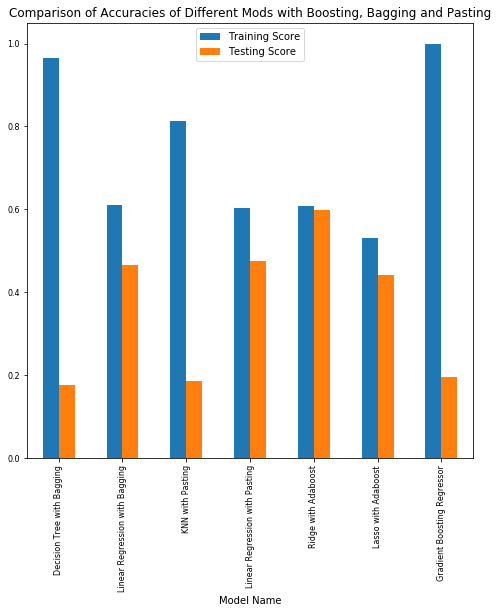

In [70]:
import matplotlib.pyplot as plt

ax = report_table[['Training Score','Testing Score']].plot(kind='bar',
            title = "Comparison of Accuracies of Different Mods with Boosting, Bagging and Pasting", figsize=(8, 8), fontsize = 8)
plt.show()

Ridge Regression with Adaboost seems to be the best model amongst the others.

# Principal Component Analysis

In [71]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [72]:
print("Number of PCA components: ", pca.n_components_)

Number of PCA components:  6


## KNN Regressor with PCA

In [73]:
from sklearn.neighbors import KNeighborsRegressor

params = {'n_neighbors':[3,4,5,6,7,8,9,10,15]}

knn = KNeighborsRegressor()

grid_knn_reg = GridSearchCV(knn, params, cv=5)
grid_knn_reg.fit(X_train_reduced, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [74]:
print("Best Parameters for KNN Regressor with PCA: ", grid_knn_reg.best_params_)

Best Parameters for KNN Regressor with PCA:  {'n_neighbors': 10}


In [75]:
pca_knn = KNeighborsRegressor(n_neighbors=10)
pca_knn.fit(X_train_reduced, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='uniform')

In [76]:
print("KNN Regressor with PCA Training Score: ", pca_knn.score(X_train_reduced, y_train))
print("KNN Regressor with PCA Testing Score: ", pca_knn.score(X_test_reduced, y_test))

KNN Regressor with PCA Training Score:  0.5666341097112795
KNN Regressor with PCA Testing Score:  0.1000626267050837


In [77]:
pca_report_table_1 = ['KNN Regressor with PCA', 'n_neighbors = 10', pca_knn.score(X_train_reduced, y_train), pca_knn.score(X_test_reduced, y_test)]

## Linear Regression with PCA

In [78]:
from sklearn.linear_model import LinearRegression

pca_lr = LinearRegression()
pca_lr.fit(X_train_reduced, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [79]:
print("Linear Regression with PCA Training Score: ", pca_lr.score(X_train_reduced, y_train))
print("Linear Regression with PCA Testing Score: ", pca_lr.score(X_test_reduced, y_test))

Linear Regression with PCA Training Score:  0.5420754521690085
Linear Regression with PCA Testing Score:  0.6184445619391601


In [80]:
pca_report_table_2 = ['Linear Regression with PCA', 'Simple', pca_lr.score(X_train_reduced, y_train), pca_lr.score(X_test_reduced, y_test)]

## Polynomial Regression with PCA

In [81]:
from  sklearn.preprocessing  import PolynomialFeatures

lr = LinearRegression()
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train_reduced)
X_test_poly = poly.transform(X_test_reduced)
lr.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [82]:
print("Polynomial Regression with PCA Training Score: ", lr.score(X_train_poly, y_train))
print("Polynomial Regression with PCA Testing Score: ", lr.score(X_test_poly, y_test))

Polynomial Regression with PCA Training Score:  0.9941347063040205
Polynomial Regression with PCA Testing Score:  -250.9681955536823


Writing the test score as 0 in the report table to make the plot of the table look proportionate.

In [83]:
pca_report_table_3 =  ['Polynomial Regression with PCA', 'Degree = 3', lr.score(X_train_poly, y_train), 0]

## Ridge Regression with PCA

In [84]:
pca_ridge = Ridge()
params = {'alpha' : [0.001, 0.01, 0.1,0,1]}

ridge_pca_grid = GridSearchCV(pca_ridge, params, cv= 5)
ridge_pca_grid. fit(X_train_reduced, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 0, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [85]:
print("Best Parameters for Ridge Regression: ", ridge_pca_grid.best_params_)

Best Parameters for Ridge Regression:  {'alpha': 1}


In [86]:
pca_ridge = Ridge(alpha = 1)
pca_ridge.fit(X_train_reduced, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [87]:
print("Ridge Regression Training Score: ", pca_ridge.score(X_train_reduced, y_train))
print("Ridge Regression Testing Score: ", pca_ridge.score(X_test_reduced, y_test))

Ridge Regression Training Score:  0.5397104035664451
Ridge Regression Testing Score:  0.5616111495061841


In [88]:
pca_report_table_4 = ['Ridge Regression with PCA', 'alpha = 1', pca_ridge.score(X_train_reduced, y_train), pca_ridge.score(X_test_reduced, y_test)]

## Lasso Regression with PCA

In [89]:
pca_lasso = Lasso()
params = {'alpha' : [0.001, 0.01, 0.1,1],
         'max_iter': [500, 1000, 5000, 10000]}

lasso_pca_grid = GridSearchCV(pca_lasso, params, cv= 5)
lasso_pca_grid.fit(X_train_reduced, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1], 'max_iter': [500, 1000, 5000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [90]:
print("Best Parameters for Lasso Regression: ", lasso_pca_grid.best_params_)

Best Parameters for Lasso Regression:  {'alpha': 0.1, 'max_iter': 500}


In [91]:
pca_lasso = Ridge(alpha = 0.1, max_iter = 500)
pca_lasso.fit(X_train_reduced, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=500,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [92]:
print("Lasso Regression Training Score: ", pca_lasso.score(X_train_reduced, y_train))
print("Lasso Regression Testing Score: ", pca_lasso.score(X_test_reduced, y_test))

Lasso Regression Training Score:  0.5420440325500699
Lasso Regression Testing Score:  0.612067792658997


In [93]:
pca_report_table_5 = ['Lasso Regression with PCA', 'alpha = 0.1, max_iter = 500', pca_lasso.score(X_train_reduced, y_train), pca_lasso.score(X_test_reduced, y_test)]

## SVM Regressor with PCA

In [94]:
from sklearn import svm

params = {'kernel': ('linear', 'rbf', 'poly'), 'gamma': [0.01, 0.1, 1, 10],'epsilon':[0.1,0.3,0.5, 1], 'C':[0.1, 1, 10, 100]}
pca_svr = svm.SVR()
svr_pca_grid = GridSearchCV(pca_svr, params)
svr_pca_grid.fit(X_train_reduced, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf', 'poly'), 'gamma': [0.01, 0.1, 1, 10], 'epsilon': [0.1, 0.3, 0.5, 1], 'C': [0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [95]:
print("Best Parameters for SVM Regressor: ", svr_pca_grid.best_params_)

Best Parameters for SVM Regressor:  {'C': 100, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [96]:
pca_svr = svm.SVR(C = 100, epsilon= 0.1, gamma= 1, kernel = 'rbf')
pca_svr.fit(X_train_reduced, y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [97]:
print("SVR Regression Training Score: ", pca_svr.score(X_train_reduced, y_train))
print("SVR Regression Testing Score: ", pca_svr.score(X_test_reduced, y_test))

SVR Regression Training Score:  0.6105266952839437
SVR Regression Testing Score:  0.07743081880759926


In [98]:
pca_report_table_6 = ['SVR Regression with PCA', 'C = 100, epsilon = 0.1, gamma = 1, kernel =rbf', pca_svr.score(X_train_reduced, y_train), pca_svr.score(X_test_reduced, y_test)]

## SGD Regressor with PCA

In [99]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(random_state= 0)

params = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber'],
    'penalty': ['l2', 'l1'],
    'learning_rate': ['constant', 'optimal'],
}

sgd_pca_grid = GridSearchCV(sgd, params)
sgd_pca_grid.fit(X_train_reduced, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=0, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]), 'loss': ['squared_loss', 'huber'], 'penalty': ['l2', 'l1'], 'learning_rate': ['constant', 'optimal']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [100]:
print("Best Parameters for SGD Regressor: ", sgd_pca_grid.best_params_)

Best Parameters for SGD Regressor:  {'alpha': 1e-05, 'learning_rate': 'optimal', 'loss': 'huber', 'penalty': 'l2'}


In [101]:
pca_sgd = SGDRegressor(alpha = 1e-05, learning_rate = 'optimal', loss = 'huber', penalty = 'l2')
pca_sgd.fit(X_train_reduced, y_train)

SGDRegressor(alpha=1e-05, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='huber', max_iter=None, n_iter=None,
       n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
       shuffle=True, tol=None, validation_fraction=0.1, verbose=0,
       warm_start=False)

In [102]:
print("SGD Regression Training Score: ", pca_sgd.score(X_train_reduced, y_train))
print("SGD Regression Testing Score: ", pca_sgd.score(X_test_reduced, y_test))

SGD Regression Training Score:  0.41175881954318494
SGD Regression Testing Score:  0.4012883962399182


In [103]:
pca_report_table_7 = ['SGD Regression with PCA', 'alpha = 1e-05, learning_rate = optimal, loss = huber, penalty = l2', pca_sgd.score(X_train_reduced, y_train), pca_sgd.score(X_test_reduced, y_test)]

## Generating a Report table: PCA
For comparing all the models, let's create a table and a plot.

In [104]:
pca_report_table = pd.DataFrame(list(zip(pca_report_table_1,
             pca_report_table_2,
             pca_report_table_3,
             pca_report_table_4,
             pca_report_table_5,
             pca_report_table_6,
             pca_report_table_7))).transpose()

In [105]:
pca_report_table.columns = ['Model Name', 'Model Parameter', 'Training Score', 'Testing Score']
pca_report_table.index = pca_report_table['Model Name']

In [106]:
pca_report_table.head(10)

,Model Name,Model Parameter,Training Score,Testing Score
Model Name,,,,
KNN Regressor with PCA,KNN Regressor with PCA,n_neighbors = 10,0.566634,0.100063
Linear Regression with PCA,Linear Regression with PCA,Simple,0.542075,0.618445
Polynomial Regression with PCA,Polynomial Regression with PCA,Degree = 3,0.994135,0
Ridge Regression with PCA,Ridge Regression with PCA,alpha = 1,0.53971,0.561611
Lasso Regression with PCA,Lasso Regression with PCA,"alpha = 0.1, max_iter = 500",0.542044,0.612068
SVR Regression with PCA,SVR Regression with PCA,"C = 100, epsilon = 0.1, gamma = 1, kernel =rbf",0.610527,0.0774308
SGD Regression with PCA,SGD Regression with PCA,"alpha = 1e-05, learning_rate = optimal, loss =...",0.411759,0.401288


In [107]:
report_table_without_pca = pd.read_csv('Report Table without PCA.csv')
report_table_without_pca.head(10)

,Model Name,Model Name.1,Model Parameter,Training Score,Testing Score
0,KNN Regressor,KNN Regressor,n_neighbors = 3,0.813184,0.185112
1,Linear Regression,Linear Regression,Simple,0.778848,0.502026
2,Polynomial Regression,Polynomial Regression,Degree = 3,0.999998,0.000000
3,Ridge Regression,Ridge Regression,alpha = 1,0.755743,0.456444
4,Lasso Regression,Lasso Regression,"alpha = 0.1, max_iter = 500",0.778212,0.496214
5,SVR Regression,SVR Regression,"C = 1, epsilon = 0.1, gamma = 10, kernel = poly",0.999597,0.000000
6,SGD Regression,SGD Regression,"alpha = 1e-06, learning_rate = optimal, loss =...",0.619898,0.396764


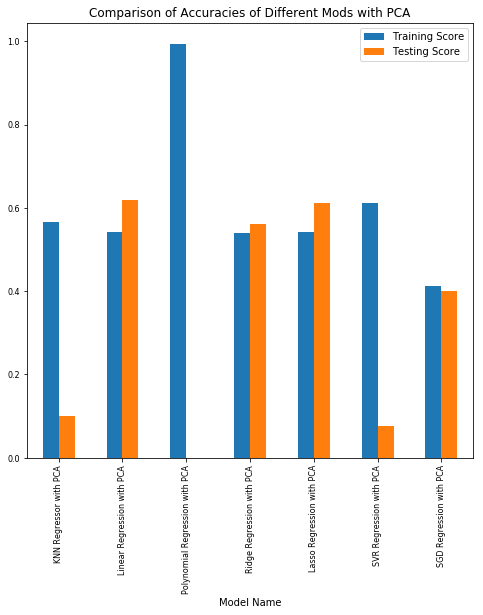

In [108]:
import matplotlib.pyplot as plt

ax = pca_report_table[['Training Score','Testing Score']].plot(kind='bar',
            title = "Comparison of Accuracies of Different Mods with PCA", figsize=(8, 8), fontsize = 8)
plt.show()

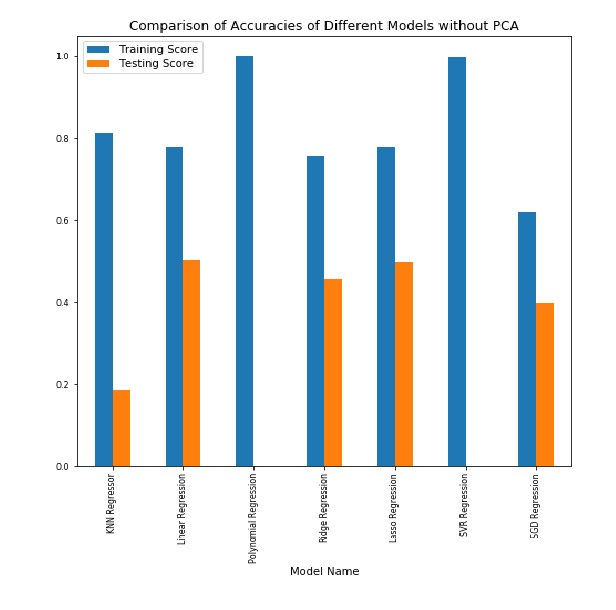

In [109]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0, 0, 1, 1])

# Hide spines, ticks, etc.
ax.axis('off')

# Display the image.
img=mpimg.imread('report_table_without_pca.png')
ax.imshow(img, aspect='auto')

Linear Regression without PCA seems to be the best model amongst the others here.

## Neural Network Model

In [110]:
from keras.models import Sequential
from keras.layers import Dense,MaxPooling1D
np.random.seed(0)

model = Sequential()
model.add(Dense(10, input_dim = 10, activation = 'relu'))
model.add(Dense(1))

model.compile(loss = 'mse', optimizer = 'sgd', metrics = ['mse'])

model.fit(X_train, y_train, epochs = 40, batch_size = 70)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
570/570 [==============================] - 0s 302us/step - loss: 276.4020 - mean_squared_error: 276.4020
Epoch 2/40
570/570 [==============================] - 0s 28us/step - loss: 215.6572 - mean_squared_error: 215.6572
Epoch 3/40
570/570 [==============================] - 0s 26us/step - loss: 184.2368 - mean_squared_error: 184.2368
Epoch 4/40
570/570 [==============================] - 0s 28us/step - loss: 161.2375 - mean_squared_error: 161.2375
Epoch 5/40
570/570 [==============================] - 0s 29us/step - loss: 148.3984 - mean_squared_error: 148.3984
Epoch 6/40
570/570 [==============================] - 0s 26us/step - loss: 152.5598 - mean_squared_error: 152.5598
Epoch 7/40
570/570 [==============================] - 0s 25us/step - loss: 121.1125 - mean_squared_error: 121.1125
Epoch 8/40
570/570 [==============================] - 0s 21us/step - loss:

In [111]:
model.evaluate(X_train, y_train)

570/570 [==============================] - 0s 91us/step


[40.79327370074758, 40.79327370074758]

In [112]:
model.evaluate(X_test, y_test)

190/190 [==============================] - 0s 75us/step


[1928.41079651682, 1928.41079651682]

In [113]:
from sklearn.metrics import r2_score
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("NN Train Score: ",r2_score(y_train, y_train_pred))
print("NN Test Score: ", r2_score(y_test, y_test_pred))

NN Train Score:  0.847608338421235
NN Test Score:  0.6332799907149307


# Model Selection

Amongst all the models Neural Network Regression model seems to be the better model. 

In [114]:
y_predicted = model.predict(X_test)
print("Predicted value for 1st testing row: ", y_predicted[0])
print("Original value for 1st testing row: ", y_test.values[0])
print("")
print("Predicted value for 5th testing row: ", y_predicted[4])
print("Original value for 5th testing row: ", y_test.values[4])

Predicted value for 1st testing row:  [0.52922744]
Original value for 1st testing row:  0.2808

Predicted value for 5th testing row:  [11.069509]
Original value for 5th testing row:  10.8756


The model works pretty well on the test data as well.

**Training and testing R2 score of around 0.84 and 0.63 was achieved using Neural Network for regression.** 